In [1]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier

data = pd.read_csv('data/model_data.csv')

X_train = pd.read_csv('data/X_train_transformed.csv')
X_test = pd.read_csv('data/X_test_transformed.csv')
y_train = pd.read_csv('data/y_train_transformed.csv')
y_test = pd.read_csv('data/y_test_transformed.csv')
X_train_notarget = pd.read_csv('data/X_train_transformed.csv')
X_test_notarget = pd.read_csv('data/X_test_transformed.csv')
#this step is necessary because we are using the already splot data inside the pycaret setup, and indexes must not overlap on the train and test data sets

#combine balanced train data back into a single df
X_train['subscribed'] = y_train
train_data = X_train

#combine test data back into a single df
X_test['subscribed'] = y_test
test_data = X_test.set_index( np.arange(len(X_train), len(X_train)+len(X_test)))

In [ ]:

from sklearn.metrics import RocCurveDisplay,roc_auc_score, f1_score,accuracy_score,confusion_matrix,classification_report,roc_curve
from sklearn.calibration import CalibratedClassifierCV
clf = MLPClassifier(hidden_layer_sizes=[20,15,10], activation='tanh', random_state=420, max_iter=300).fit(X_train, y_train)

#Classes are ordered [0,1]
y_pred = clf.predict_proba(X_test)
y_pred = [i[1] for i in y_pred]
y_score = y_pred
y_pred = pd.Series(list(np.where(np.array(y_pred) > 0.5, 1, 0 ))) 

report = classification_report(y_test, y_pred)
print(report)
import scikitplot as skplt
import matplotlib.pyplot as plt


#Plot AOC Curves
y_probas = clf.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_probas)
plt.show()

In [2]:
from pycaret.classification import *
s = (setup(data=train_data,
           test_data=test_data,
            target = 'subscribed',
            session_id = 420,
            fold=10,
            ))

,Description,Value
0,Session id,420
1,Target,subscribed
2,Target type,Binary
3,Original data shape,"(63546, 54)"
4,Transformed data shape,"(63546, 54)"
5,Transformed train set shape,"(51190, 54)"
6,Transformed test set shape,"(12356, 54)"
7,Numeric features,53
8,Preprocess,True
9,Imputation type,simple


In [4]:
mlp = MLPClassifier(hidden_layer_sizes=[34], solver='adam', activation='relu', random_state=420, max_iter=64, batch_size=17064)

nn = create_model(mlp)

#evaluate_model(nn)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7050,0.7610,0.6096,0.7533,0.6739,0.4100,0.4177
1,0.7468,0.8260,0.6831,0.7828,0.7295,0.4936,0.4977
2,0.7701,0.8544,0.7249,0.7968,0.7592,0.5401,0.5423
3,0.7681,0.8533,0.7194,0.7970,0.7562,0.5362,0.5388
4,0.7621,0.8515,0.7061,0.7950,0.7479,0.5241,0.5274
5,0.7693,0.8503,0.7172,0.8007,0.7566,0.5386,0.5415
6,0.7544,0.8449,0.7070,0.7812,0.7423,0.5089,0.5112
7,0.7748,0.8591,0.7152,0.8120,0.7605,0.5495,0.5535
8,0.7591,0.8374,0.7039,0.7914,0.7451,0.5183,0.5215


In [24]:
#Classes are ordered [0,1]
y_pred = nn.predict_proba(X_test_notarget)
y_pred = [i[1] for i in y_pred]
y_score = y_pred
y_pred = pd.Series(list(np.where(np.array(y_pred) > 0.5, 1, 0 ))) 

import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

#Plot AOC Curves
y_probas = nn.predict_proba(X_test_notarget)
# skplt.metrics.plot_roc_curve(y_test, y_probas)
# plt.show()



ValueError: y should be a 1d array, got an array of shape (12356, 2) instead.

In [9]:
pred_holdout = predict_model(nn, probability_threshold=0.478) 


In [10]:
probas = nn.predict_proba(X_test.loc[:, X_test.columns != 'subscribed'])[:,1]
probas

array([0.61637088, 0.68275742, 0.17093152, ..., 0.18317915, 0.50047578,
       0.35858335])

In [11]:

y_true = pred_holdout['subscribed']
y_pred = pred_holdout['prediction_label']
predicts = pred_holdout['prediction_score']

from sklearn.metrics import roc_curve

from numpy import argmax

fpr, tpr, thresholds = roc_curve(y_true,probas)

# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))



Best Threshold=0.521943


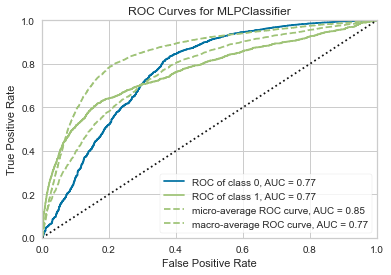

In [4]:
plot_model(nn,plot='auc')

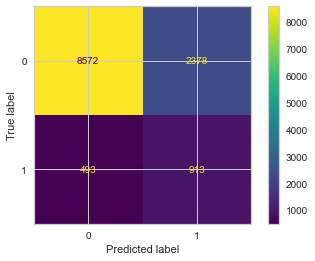

array([[8572, 2378],
       [ 493,  913]], dtype=int64)

In [12]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(pred_holdout['subscribed'], pred_holdout['prediction_label'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=nn.classes_)

disp.plot()

plt.show()

cm



In [5]:
pred_holdout = predict_model(nn, probability_threshold=0.5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,MLP Classifier,0.7914,0.7676,0.6380,0.3025,0.4104,0.3028,0.3340


In [ ]:
pred_train = predict_model(nn,data=train_data, probability_threshold=0.5)
pred_train

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(pred_train['subscribed'], pred_train['prediction_label'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=nn.classes_)

disp.plot()

plt.show()

cm



In [ ]:

#SHAP
import shap

background = X_train_notarget.iloc[np.random.choice(X_train_notarget.shape[0], 100, replace=False)]

explainer = shap.KernelExplainer(nn.predict,background)
shap_values = explainer.shap_values(X_test_notarget[1:256])


#shap.plots.bar(shap_values[0])

In [ ]:
shap.summary_plot(shap_values,feature_names=X_test_notarget.columns.tolist(),features=X_test_notarget[1:256], max_display=15)
#shap.decision_plot(base_value=explainer.expected_value,shap_values=shap_values,feature_names=X_test_notarget.columns.tolist())




In [9]:
y_test

AttributeError: 'DataFrame' object has no attribute 'tolist'

In [17]:
from sklearn.metrics import roc_curve

y_pred = nn.predict_proba(X_test_notarget)

#fpr, tpr, threshholds = roc_curve(y_test,y_pred)

array([0.38362912, 0.61637088])